
# Linear Programming Lab

## Total: 40 points

In this lab, you will explore a useful extension of linear programming duality (covered in class
LP Day 1) called linear programming sensitivity analysis. Here, we aim to find:

- How does the solution change when the objective function changes?
- How does the solution change when the resource limits change?
- How does the solution change when a constraint is added to the problem?

One approach to these types of questions is solving lots of slightly different linear programming problems. This method would work, but it is inelegant and (for large problems) computationally expensive (but in most cases today, computation is cheap and computing solutions to many problems is a standard technique to study sensitivity in practice). However, there is a more elegant solution
that gives these answers just by examining the dual information provided by the Simplex Algorithm.

**Consider the following scenario:** An instrument company makes trombones and trumpets. A trombone requires 40 square inches of metal sheet and a trumpet requires 30 square inches of metal. Metal costs $1 per square inch and 40,000 square inches are available. It takes two hours of skilled labor to make a novice quality trombone or a novice quality trumpet. Three more hours of skilled labor will turn a novice quality trombone into a professional trombone. Two more hours of skilled labor will turn a novice quality trumpet into a professional trumpet. There are 6000 hours of skilled labor available. Assume that you do not need to pay for labor. Assume that you can sell fractional trombones and trumpets. The market selling prices and production costs are given in the following table:

| Product    | Market Price | Cost (metal $1/sq.in.) |
| -------- | ------- | ------- |
| Novice Trombone | $70 | $40 |
| Professional Trombone | $140 | $40 |
| Novice Trumpet | $60 | $30 |
| Professional Trumpet | $110 | $30 |

---


# Problem 1: Formulate the LP (5 points)
## 1a: Set up the LP (3 points)

Write an objective function that maximizes profits (market price - production
costs) and all constraints.

### Instructions
- Write the equations, using LaTeX, between the $$ tags. Then convert the LP problem into code by referring to this documentation: [PuLP Guide](https://realpython.com/linear-programming-python/#using-pulp)

### Solution:
Variables:
$$x_1 = \text{Novice Trombone}$$
$$x_2 = \text{Professional Trombone}$$
$$x_3 = \text{Novice Trumpet}$$
$$x_4 = \text{Professional Trumpet}$$

Objective Function: $$ Z = 30x_1 + 100x_2 + 30x_3 + 80x_4 $$

Constraints:
- Metal usage constraint: $$ 40x_1 + 40x_2 + 30x_3 + 30x_4 \leq 40,000 $$
- Labor usage constraint: $$ 2x_1 + 5x_2 + 2x_3 + 4x_4 \leq 6,000 $$
- Non-negativity constraint: $$ x_1, x_2, x_3, x_4 \geq 0 $$

In [1]:
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, PULP_CBC_CMD
import copy

# Define the problem
main_model = LpProblem(name="instrument-production", sense=LpMaximize) # (please do not rename this variable as it's used later in the notebook)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Objective function
main_model += 30*x1 + 100*x2 + 30*x3 + 80*x4

# Constraints
# 1. Total metal sheet used
main_model += 40*x1 + 40*x2 + 30*x3 + 30*x4 <= 40000, "metal_usage_constraint"

# 2. Total skilled labor hours used
main_model += 2*x1 + 5*x2 + 2*x3 + 4*x4 <= 6000, "labor_usage_constraint"

# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

## 1b) Solve the LP Computationally (1 point)
Use the model we created above to find the optimal profit. Run the code block below to solve the problem.

### Solution:

Optimal Profit: $106,666.67

In [2]:
# Solve the problem
main_model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/enriccogemha/.pyenv/versions/3.9.21/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/3_/5dvts2vs4s1bdt0tz8nb_y900000gn/T/e6cffc93b3fd43f9b57aac155a37d409-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/3_/5dvts2vs4s1bdt0tz8nb_y900000gn/T/e6cffc93b3fd43f9b57aac155a37d409-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 20 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj -0 Dual inf 270 (4)
0  Obj -0 Dual inf 270 (4)
1  Obj 106666.67
Optimal - objective value 106666.67
Optimal objective 106666.6667 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):

1

## 1c.) What is the optimal number of each instrument to produce? (1 point)
Run the code cell below to find the optimal value for each variable in the model. Fill in the table below.
### Solution:

| Variable    | Value |
| -------- | ------- |
| x1 | 0 |
| x2 | 0 |
| x3 | 0 |
| x4 | 1333.3333 |

In [3]:
for var in main_model.variables():
    print(var.name, var.value())

x1 0.0
x2 0.0
x3 0.0
x4 1333.3333


# Problem 2: Sensitivity of Novice Quality Trumpets (5 points)

## 2a) (2 points)

What would happen if the market price of novice quality trumpets went up? In other words, how much can the market price coefficient in the objective function change without causing the optimal basis to change? This is also called “allowable increase.” You are provided a helper function to find the allowable increase. Try messing with the parameters and looking at the source code in the `helpers.py` file to understand how it works.

### Solution:
It's possible to increase the price of novice trumpets ($x_3$) from the current $\$60.00$ up to $\$110.00$ without affecting the optimal production plan, producing only professional trumpets ($x_4$). So after that point, the optimal solution moves to producing all novice trumpets. However, as both of them have the same production cost, only differing in the number of skilled labor hours required, the company would be able to produce more novice trumpets compared to professionals, while sustaining the same costs, what would increase profits, if not for the fact that the company has a limited amount of metal available, which would prevent the company from producing more than $1,333.33$ novice or professional trumpets.

In [4]:
from helpers import find_allowable_increase
# Run the helper to find the allowable increase for x3
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x3", base_coef=60, step=5)

print(f"The allowable increase for x3 is: {allowable_increase}")

Iteration 1: Coefficient of x3: 60, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x3: 65, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x3: 70, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 4: Coefficient of x3: 75, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x3: 80, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x3: 85, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
---------------------------------------

/Users/enriccogemha/.pyenv/versions/3.9.21/lib/python3.9/site-packages/pulp/pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


## 2b) (2 points)
Would novice trumpets be more profitable than professional trumpets to produce if novice trumpets sold for the same amount as professional quality trumpets?

### Solution:
The production costs for both novice and professional trumpets are the same, $\$30.00$. However, as the novice requires 2 hours of skilled labor and the professional requires 4 hours, the company would be able to produce more novice trumpets than professionals, what would increase the overall profits of the company. However, the current constrain actually lies on the amount of metal, that is limiting the production to $1,333.333$ trumpets. Therefore, it would not make a difference on the company's profits to produce either trumpets.

## 2c) (1 point)
What would change if the price went down?

### Solution:
If the price of novice trumpets went down from its current $\$60.00$, the optimal production plan would remain the same. This happens because novice trumpets are not being produced, due to their already low $\$30.00$ profit margin, and lowering this price would only make them even less profitable. Therefore, the company would continue producing only professional trumpets as this remains the most profitable use of the currently constraining metal resource.

# Problem 3: Sensitivity of Novice Quality Trombones (5 points)

## 3a) (2 points)

What would happen if the market price of novice quality trombones went up? In other words, what is the “allowable increase” in the market price of novice quality trombones?


### Solution:
It's possible to increase the price of novice trombones ($x_1$) from the current $\$70.00$ up to $\$147.00$ without affecting the optimal production plan, producing only professional trumpets ($x_4$). So after that point, the optimal solution moves to producing all novice trombones. This shows how steep the price increase would need to be for novice trombones to start being produced, reinforcing again that the current strategy of producing only professional trumpets is the most profitable, specially given the metal constraints, in which the trombone requires $40 \text{ square inches of metal}$, while the trumpet only requires $30$.

In [5]:
from helpers import find_allowable_increase

# setting verbose to False since we take smaller steps for this variable and don't want to print every iteration
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x1", base_coef=60, step=1, max_iter=100, verbose=False)

print(f"The allowable increase for x1 is: {allowable_increase}")

Optimal basis changed at coefficient 137.

The allowable increase for x1 is: 77


## 3b) (3 points)
Would they be profitable to produce if they sold for the same amount as professional quality trombones? What would make them profitable to produce (intuitive explanation is expected, not specific numbers)?

### Solution:
No, even if novice trombones sold for the same $\$140.00$ as professional trombones, they still wouldn't be profitable to produce. 

The current optimal strategy is to produce professional trumpets for $\$110.00$, because they provide the best use of metal. Check the profit per square inch of metal for each instrument:

- Professional trumpets: $\$80/30$ = $\$2.67 \text{ profit per sq inch}$
- Novice trombones at $\$140$: $\$100/40$ = $\$2.50 \text{ profit per sq inch}$

Since metal is limiting production, novice trombones would only become profitable by generating more profit per square inch of metal than professional trumpets.

# Problem 4: Sensitivity of Professional Quality Trumpets (2 points)

What would happen to the optimal solution if the price of professional quality trumpets fell to $100? If there is a change, what would the new production plan and optimal profit be?

Provide your analysis and corresponding code below.

### Solution:
A price of $\$100.00$ for professional quality trumpets would cause the optimal production strategy to shift to full professional trombones ($x_2$) manufacturing, with a total of $1,000 \text{ units}$.

The price drop changes the scenario. Now, professional trombones have a $\$100$ profit per 40 sq inches compared to professional trumpets with a new $\$70$ profit per 30 sq inches.

In [6]:
low_trumpet_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Objective function
low_trumpet_model += 30*x1 + 100*x2 + 30*x3 + 70*x4

# Constraints
low_trumpet_model += 40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 <= 40000, "Metal Sheet Constraint"
low_trumpet_model += 2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 <= 6000, "Skilled Labor Constraint"

# Solve the low_trumpet_model
low_trumpet_model.solve(PULP_CBC_CMD(msg=0))

# Display results
print("Sensitivity Analysis for Professional Quality Trumpets (Price = $100):")
print(f"Objective value (Profit): {low_trumpet_model.objective.value()}")
for var in low_trumpet_model.variables():
    print(f"{var.name}: {var.value()}")

Sensitivity Analysis for Professional Quality Trumpets (Price = $100):
Objective value (Profit): 100000.0
x1: 0.0
x2: 1000.0
x3: 0.0
x4: 0.0


# Problem 5: Sensitivity of Metal Resources (8 points)

## 5a) (4 points)
How do production plans change when metal supplies change? At which point does metal stop being a limiting resource and how do you know?

**HINT**: To find out how the production plans change when metal supplies change, you can use a **guess-and-check approach**. 

1. Start with the current RHS of the "Metal Sheet Constraint" (40,000 square inches).
2. Gradually increase or decrease the RHS (e.g., by 1,000 or 5,000 units at a time).
3. For each adjustment:
   - Re-run to solve the problem and record the production plan (values of x_1, x_2, x_3, x_4) and the total profit.
   - Compare the new solution to the original solution (at RHS = 40,000).
4. Stop increasing when you notice the production plan has stopped changing. The last RHS value before the variable values stop changing is the **RHS Tolerance Upper Bound**.
5. Stop decreasing when the model becomes infeasible. The last RHS value before the model becomes infeasible is the **RHS Tolerance Lower Bound**.

### Solution:
The production plan changes as the metal supply changes, until it reaches a upper bound of 45,000 square inches of metal, when it stops changing based on the metal supply addition. The lower bound is sort of "non-existent", as long as the RHS is above 0, as the model becomes infeasible when the metal supply is 0, due to its non-zero initial constraint.

In [7]:
rhs_tol_model = copy.deepcopy(main_model)

# Print the results
print("Initial Solution:")
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

# ---------------------------------------------
# Guess-and-Check Setup
# ---------------------------------------------
# Change the RHS of the "Metal Sheet Constraint" below and re-run this block of code.
rhs_tol_model.constraints["metal_usage_constraint"].changeRHS(1)

print("---------------------------------------------")
print("After Adjusting Metal Sheet Constraint:")

# Re-solve the problem
rhs_tol_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[rhs_tol_model.status]}")

# Print updated results
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Initial Solution:
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
  metal_usage_constraint: RHS = -40000, slack = -0.0
  labor_usage_constraint: RHS = -6000, slack = 666.6666999999998
---------------------------------------------
After Adjusting Metal Sheet Constraint:
Model Solution Status: Optimal
Total Profit: $2.67
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 0.033333333

Slack Values for Constraints:
  metal_usage_constraint: RHS = -1, slack = -0.0
  labor_usage_constraint: RHS = -6000, slack = 5999.86666667


## 5b) (4 points)
**What is the shadow price of metal?**  
1. Explain the concept of a shadow price in the context of the "Metal Sheet Constraint" and how it impacts the objective function (profit).  
2. Using the shadow price, calculate how much the profit is expected to change if the metal supplies increase by 500 square inches.  
3. Solve the problem again with the increased metal supplies and verify the expected profit change and the new production plan.

Use the following formula for profit change:  
$$ \Delta profit = \Delta \text{metal supplies quantity} \cdot dual_{metal} $$

---

### HINT

1. **What is the Shadow Price?**  
   The shadow price (also called the dual value) of a constraint tells you how much the objective value (profit) will change per unit increase in the RHS of the constraint, as long as the change is within the **RHS tolerance interval**.

2. **How to Find the Shadow Price?**  
   - Solve the LP model with the original RHS.
   - Check the **dual value** (`constraint.pi`) of the "Metal Sheet Constraint" in the solver's output. This is the shadow price.

3. **Useful Methods**
   - Use `shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(new_rhs)` to update the RHS of the "Metal Sheet Constraint"

### Solution:
The shadow price of metal is $\$2.67$ per square inch. This represents how much the profit will increase per additional square inch of metal in the `Metal Constraint`. Therefore, if the metal supply increases by 500 square inches, the profit is expected to increase by $\$1,333.33$, without truncating the shadow price. When rerunning the model with the increased metal supply, the profit is expected to increase to $\$108,000.00$, while the new production plan will produce $1,350.00$ professional trumpets, not being limited by the metal supply.

In [8]:
shadow_model = copy.deepcopy(main_model)

# TODO: Solve the shadow price problem
shadow_model.solve()

print("*Results with Shadow Price Analysis*")
dual_metal = shadow_model.constraints["metal_usage_constraint"].pi
print(f"\nShadow Price (dual value) of Metal: ${abs(dual_metal):.2f}")

metal_increase = 500
expected_profit_change = metal_increase * abs(dual_metal)
print(f"Profit Change for 500 metal increase: ${expected_profit_change:.2f}")

current_profit = shadow_model.objective.value()
print(f"Current Profit: ${current_profit:.2f}")
print(f"New Profit: ${current_profit + expected_profit_change:.2f}")

# TODO: Update RHS
current_rhs = -shadow_model.constraints["metal_usage_constraint"].constant
new_rhs = current_rhs + metal_increase
shadow_model.constraints["metal_usage_constraint"].changeRHS(new_rhs)

shadow_model.solve()

# Display the new results
print("*New Results with Increased Metal Supply*")
print(f"New Profit: {shadow_model.objective.value():.2f}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.value()}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/enriccogemha/.pyenv/versions/3.9.21/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/3_/5dvts2vs4s1bdt0tz8nb_y900000gn/T/b1c71153cf2e4afcaf77ca857eaae0e9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/3_/5dvts2vs4s1bdt0tz8nb_y900000gn/T/b1c71153cf2e4afcaf77ca857eaae0e9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 20 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj -0 Dual inf 270 (4)
0  Obj -0 Dual inf 270 (4)
1  Obj 106666.67
Optimal - objective value 106666.67
Optimal objective 106666.6667 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):

# Problem 6: Sensitivity of Labor Resources (5 points)

## 6a) (1 point)
How much labor is unused?

HINT: What is the slack?

### Solution:
$666.67$ hours of labor are unused, in slack. This means $5,333.33$ hours are being utilized in the optimal production plan.

In [9]:
# TODO: Calculate the slack for the skilled labor constraint
skilled_labor_slack = main_model.constraints["labor_usage_constraint"].slack
print(f"Skilled Labor Constraint Slack: {skilled_labor_slack}")


Skilled Labor Constraint Slack: 666.6666999999998


## 6b) (2 points)
How much would you be willing to pay an additional laborer?

### Solution:
Talking purely about the labor cost, the company would not be willing to pay any additional laborer, as the current labor supply is not being fully utilized. Only after increasing the metal supply, and therefore increasing production, then it would be possible to pay for additional labor.

## 6c) (2 points)
Suppose that industrial regulation complicate the process so it takes an additional hour of labor to turn a novice quality instrument into a professional quality instrument. How and why does that change affect the optimal production plan and profit?

### Solution:
Without doing any calculations, it's possible to infer that the constraint would no longer be the metal supply, but the labor supply. It's also possible to infer that the overall profit would decrease, as the company would produce less professional instruments, due to the labor supply being a limiting factor.

# Problem 7: Sensitivity of New Constraint (5 points)

## 7a) (4 points)
The owner of the company comes up with a design for a beautiful hand-crafted tuba. Each tuba requires 250 hours of labor (6.25 weeks of full time work) and uses 50 square inches of metal. If the
company can sell tubas for $200, would it be worthwhile to produce? Use:
$$ \text{(marginal cost of metal)}_{tuba} = \text{(metal used)}_{tuba} \cdot dual_{metal} $$

Discuss how looking at the shadow prices of metal and labor can help
you intuit whether diverting metal resources to tuba production is a good idea. Check your intuition with the solver.

### Solution:
After evaluating the modle and the shadow prices of metal and labor, it's possible to intuit that the company should mix the production of professional trumpets with a small amount of tubas ($2.74$ units), making the maximum profit slightly higher than the current optimal profit. This conjunction would help maximize the usage of both constraints, metal and labor.

In [10]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Define the problem
tuba_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet
x5 = LpVariable(name="x5", lowBound=0)  # Tubas

# Define the problem and analyze the shadow prices
tuba_model += 30*x1 + 100*x2 + 30*x3 + 80*x4 + 150*x5

# Constraints
tuba_model += (40*x1 + 40*x2 + 30*x3 + 30*x4 + 50*x5 <= 40000, "metal_constraint")
tuba_model += (2*x1 + 5*x2 + 2*x3 + 4*x4 + 250*x5 <= 6000, "labor_constraint")

# Solve the problem
status = tuba_model.solve()

# Display the results
print(f"Objective: {value(tuba_model.objective)}")
for var in tuba_model.variables():
    print(f"{var.name}: {var.value()}")

# Analyze the shadow prices
dual_metal = tuba_model.constraints["metal_constraint"].pi
dual_labor = tuba_model.constraints["labor_constraint"].pi

print(f"Shadow Price for Metal: ${dual_metal:.2f}")
print(f"Shadow Price for Labor: ${dual_labor:.2f}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/enriccogemha/.pyenv/versions/3.9.21/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/3_/5dvts2vs4s1bdt0tz8nb_y900000gn/T/517c3f8b09a54467a229b07b179ff657-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/3_/5dvts2vs4s1bdt0tz8nb_y900000gn/T/517c3f8b09a54467a229b07b179ff657-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 23 RHS
At line 26 BOUNDS
At line 27 ENDATA
Problem MODEL has 2 rows, 5 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 5 (0) columns and 10 (0) elements
0  Obj -0 Dual inf 949.76675 (5)
0  Obj -0 Dual inf 949.76675 (5)
2  Obj 106712.33
Optimal - objective value 106712.33
Optimal objective 106712.3288 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time 

## 7b) (1 point)
Is it profitable if tubas sell for $150? Why?

### Solution:
No, it wouldn't be profitable to sell tubas for $\$150.00$, since each tuba has a marginal cost, for metal alone, of:
$$ 50 \text{ sq inches} \cdot \$2.66 = \$133.00 $$
Based on the shadow cost of labor, the marginal cost for labor would be:
$$ 250 \text{ hours} \cdot \$0.07 = \$17.50 $$
Therefore, the total marginal cost for each tuba would be:
$$ \$133.00 + \$17.50 = \$150.50 $$
This means that the company would lose $\$0.50$ for each tuba produced and sold, if the selling price was $\$150.00$, making it unprofitable.

# Problem 8: Making Sense of the Dual Problem (5 points)

## 8a) (3 points)
Set up the original problem’s corresponding dual LP. Write an objective function that maximizes profits (market price - production costs) and all dual constraints.

In [11]:
from pulp import LpMinimize, LpProblem, LpVariable

# Define the dual problem
dual_model = LpProblem(name="dual-instrument-production", sense=LpMinimize)

# Define the dual problem
y1 = LpVariable(name="y1", lowBound=0) # Metal Constraint
y2 = LpVariable(name="y2", lowBound=0) # Labor Constraint

# Objective function
dual_model += 40000*y1 + 6000*y2, "dual_objective"

# Constraints
dual_model += 40*y1 + 2*y2 >= 30, "novice_trombone"
dual_model += 40*y1 + 5*y2 >= 100, "professional_trombone"
dual_model += 30*y1 + 2*y2 >= 30, "novice_trumpet"
dual_model += 30*y1 + 4*y2 >= 80, "professional_trumpet"

## 8b) (1 point)
Run the code block below to solve the problem. What is the optimal profit? Give a plot of the constraints (you can use this [example](https://github.com/hakeemrehman/Python-PuLP-/blob/master/LP%20Using%20PuLP%20and%20Graphical%20Sol..ipynb) for guidance).

In [12]:
# Solve the dual problem
dual_model.solve(PULP_CBC_CMD(msg=0))

# Display the results
print("Dual Problem Results:")
print(f"Optimal Value (Total Resource Value): {dual_model.objective.value()}")

Dual Problem Results:
Optimal Value (Total Resource Value): 106666.66799999999


The constrains for the dual problem are:

$$ 40y_1 + 2y_2 \geq 30 \longrightarrow y_2 \geq 15 - 20y_1 \longrightarrow \text{Novice Trombone} $$
$$ 40y_1 + 5y_2 \geq 100 \longrightarrow y_2 \geq 20 - 8y_1 \longrightarrow \text{Professional Trombone} $$
$$ 30y_1 + 2y_2 \geq 30 \longrightarrow y_2 \geq 15 - 15y_1 \longrightarrow \text{Novice Trumpet} $$
$$ 30y_1 + 4y_2 \geq 80 \longrightarrow y_2 \geq 20 - 7.5y_1 \longrightarrow \text{Professional Trumpet} $$

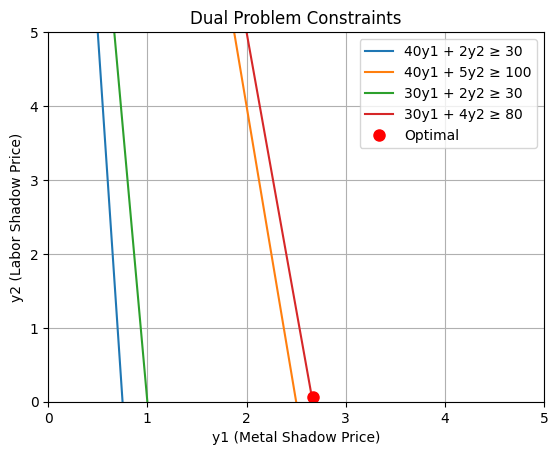

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Plot constraints
y1 = np.linspace(0, 5, 100)
plt.plot(y1, 15 - 20*y1, label='40y1 + 2y2 ≥ 30')
plt.plot(y1, 20 - 8*y1, label='40y1 + 5y2 ≥ 100')
plt.plot(y1, 15 - 15*y1, label='30y1 + 2y2 ≥ 30')
plt.plot(y1, 20 - 7.5*y1, label='30y1 + 4y2 ≥ 80')

# Plot optimal point
plt.plot(2.67, 0.07, 'ro', markersize=8, label='Optimal')

# Configure plot
plt.grid(True)
plt.xlabel('y1 (Metal Shadow Price)')
plt.ylabel('y2 (Labor Shadow Price)')
plt.title('Dual Problem Constraints')
plt.legend()
plt.axis([0, 5, 0, 5])
plt.show()

## 8c) (1 point)
Say something about the relationship between dual variables and slackness in the primal and dual problem.

### Solution:
When a constraint in the primal problem has slack, its dual variable must be zero. More specifically, the metal constraint is fully used and has a positive shadow price of $2.67, while labor has a lot of slack and a low shadow price of $0.07.
The same happens in the dual problem, where only the Professional Trompet is being produced and has a positive shadow price, while the other constraints have slack and a zero shadow price. This shows how the relationship between dual variables, or shadow prices, and slackness in both problems is directly related.